In [1]:
import sys
from pathlib import Path
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from src.data.threshold_classifiers.lda import LDAThresholdClassifier

C:\Temp\ipykernel_4836\1963054940.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
overlaping_pairs = []
non_overlaping_pairs = []

In [3]:
dataset_path = Path("..\\..\\datasets\\PlagiNet\\cases")

for case_dir in dataset_path.iterdir():
    if case_dir.is_dir():
        midi_files = list(case_dir.glob("*.mid"))
        overlaping_pairs.append((midi_files[0], midi_files[1]))

all_melodies = [midi for pair in overlaping_pairs for midi in pair]

for i, melody1 in enumerate(all_melodies):
    for melody2 in all_melodies[i+1:]:
        if melody1.parent != melody2.parent:
            non_overlaping_pairs.append((melody1, melody2))

In [4]:
classifier = LDAThresholdClassifier()

X_scaled, y = classifier.prepare_features_dataset(overlaping_pairs, non_overlaping_pairs)

Extracting non-overlapping features: 100%|██████████| 760/760 [00:22<00:00, 33.22it/s]


In [5]:
df = pd.DataFrame(np.concatenate([X_scaled, y.reshape(-1, 1)], axis=1), columns=classifier.feature_names + ['is_overlapping'])
df

,levenshtein_distance,match_len1,match_len2,match_ratio1,match_ratio2,note_C,note_C♯,note_D,note_D♯,note_E,...,interval_6,interval_7,interval_8,interval_9,interval_10,interval_lt,interval_gt,interval_to_rest,interval_from_rest,is_overlapping
0,0.235290,-0.511300,-0.506725,-0.559560,-0.567225,-0.525179,-0.721058,-0.441421,-0.668382,-0.912110,...,-0.407332,0.014410,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-1.004430,-1.004430,1.0
1,-1.185390,1.003109,0.992224,1.468427,0.240478,-0.914570,0.333407,-0.587439,-0.668382,-0.510787,...,-0.407332,0.991754,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,1.0
2,-1.181321,2.168038,1.128492,2.692045,2.489196,-0.135788,-0.325633,-1.025490,-0.136766,-0.611117,...,2.455000,-0.474263,1.869871,-0.271666,-0.328564,-0.473907,-0.365269,-1.332923,-1.332923,1.0
3,-1.176717,0.129412,4.330794,-0.066850,2.188405,3.238934,-0.193825,-0.295404,0.394850,-0.912110,...,-0.407332,-0.962935,-0.397618,-0.271666,-0.328564,2.436703,-0.365269,0.966527,0.966527,1.0
4,-1.185105,2.925243,1.332895,2.279954,2.576522,-0.784773,-0.721058,2.040872,0.572055,-0.912110,...,-0.407332,-0.474263,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.064958,-0.511300,-0.506725,-0.559560,-0.567225,-0.914570,-0.721058,0.142648,-0.668382,0.693183,...,-0.407332,0.991754,-0.397618,-0.271666,-0.328564,-0.473907,2.813638,-1.332923,-1.332923,0.0
776,0.235290,-0.511300,-0.506725,-0.559560,-0.567225,-0.784773,-0.721058,1.602820,0.749261,0.592852,...,-0.407332,2.946444,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,0.0
777,0.040625,-0.511300,-0.506725,-0.559560,-0.567225,-0.784773,-0.721058,0.142648,-0.491177,0.592852,...,-0.407332,0.991754,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,-0.347445,-0.347445,0.0
778,0.381288,-0.511300,-0.506725,-0.559560,-0.567225,-0.265585,-0.721058,0.142648,0.926466,0.693183,...,-0.407332,2.946444,-0.397618,-0.271666,-0.328564,-0.473907,-0.365269,0.966527,0.966527,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
classifier.fit(X_train, y_train)

In [8]:
fpr, tpr, auc = classifier.get_roc_curve(X_test, y_test)
auc

0.4029605263157895

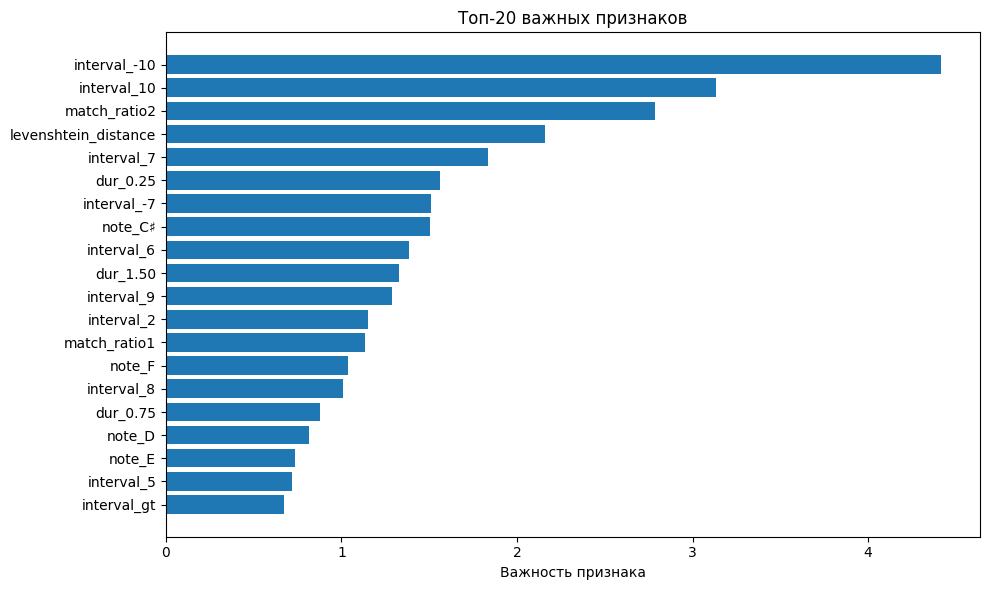

In [9]:
feature_importance = classifier.get_feature_importance()
top_features = list(feature_importance.items())[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Важность признака')
plt.title('Топ-20 важных признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()